In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
train = pd.read_csv('/content/drive/MyDrive/Educayshion/Colabs/Projects/Titanic/titanic/train.csv')

In [84]:
titanic = train.copy()

## EDA and Data Cleaning

In [85]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
print("Missing age:", titanic['Age'].isna().sum())
print("Missing Cabin number:", titanic['Cabin'].isna().sum())
print("Missing Embarkation: ", titanic['Embarked'].isna().sum())

Missing age: 177
Missing Cabin number: 687
Missing Embarkation:  2


There are 177 missing values for `Age`, 687 missing values for `Cabin`, and 2 missing values for `Embarked`. The feature `Cabin` is unnecessary, so we will remove it. We will also remove `Ticket` and `Name`, since we won't be using those. We will also remove the 2 rows with `Embarked` missing. Then, we will impute the `Age` feature for the missing values.

In [90]:
titanic.drop(columns = ['Cabin', 'Ticket', 'Name'], inplace=True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [91]:
titanic.dropna(axis=0, how='any', subset=['Embarked'], inplace=True)
titanic.shape[0]

889

Now, to find out what method we can use to impute the missing age values, let's dig deep into that.

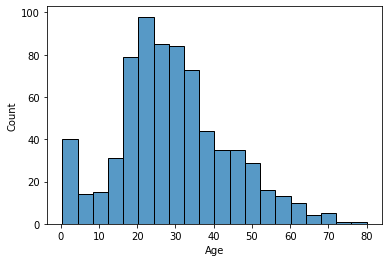

In [92]:
sns.histplot(titanic['Age'])

The age distribution looks slightly skewed to the right, so we will impute the missing age using the median.

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
titanic[titanic['Age'].isnull()]
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(np.array(titanic['Age']).reshape(-1,1))
imputed_age = imp_median.transform(np.array(titanic['Age']).reshape(-1,1))
titanic['Age'] = imputed_age

In [95]:
titanic['Age'].isnull().sum()

0

Let's encode `Sex` as numeric values for easier processing and look at the demographics of the people on the Titanic and of those who survived more closely.

In [96]:
sex = titanic['Sex']
sex = sex.to_numpy().reshape(-1,1)
sex[:5]

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male']], dtype=object)

In [97]:
from sklearn.preprocessing import OneHotEncoder
sex_enc = OneHotEncoder(drop='if_binary')
sex_encoded = sex_enc.fit_transform(sex)
sex_encoded = sex_encoded.toarray()

In [98]:
sex_encoded[:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.]])

So Male is 1, and Female is 0.

In [99]:
titanic['Sex'] = sex_encoded.astype(np.uint8)

In [100]:

titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


### Next steps:
- Determine which variables correlate with `Survived`.
- Determine the percentage of each sex and each passenger class in the entire dataset and in the ones who survived.
- Remove `Name` and `Embarked` and any that has no correlation.
- (?) Normalize numeric data.

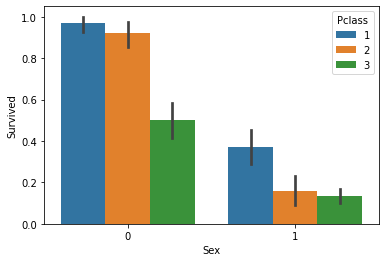

In [101]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic)

From the graph above, it looks like women are more likely to survive than men. Also, passengers with higher class status are more likely to survive as well.

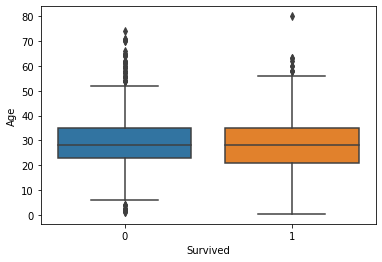

In [102]:
sns.boxplot(x='Survived', y='Age', data=titanic)

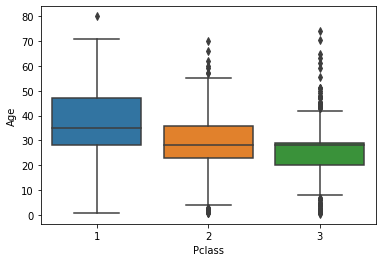

In [103]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

The distribution of the age of survivors versus non-survivors are similar, but it seems older passengers tend to have higher class status. 

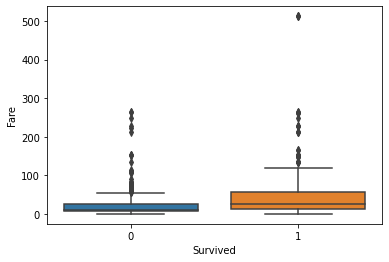

In [104]:
sns.boxplot(x='Survived', y='Fare', data=titanic)

The mean fare of a survivor versus a non-survivor looks roughly similar, but we suspect a survivor to have paid higher fare price.

### Hypothesis Testing

We will test the following hypotheses:
1. Women are more likely to survive than men.
2. The mean age of those who survived is different from the mean age of those who did not.
3. Passengers who paid higher fare prices are more likely to survive.


In [105]:
from statsmodels.stats.proportion import proportions_ztest

Let $p_0$ and $p_1$ be the proportions of women and men who survived. We test the hypothesis:
- $H_0:$ $p_0 = p_1$
- $H_1:$ $p_0 > p_1$ 

In [106]:
n_women_survived = len(titanic[(titanic['Sex'] == 0) & (titanic['Survived'] == 1)])
n_women = len(titanic[titanic['Sex'] == 0])

n_men_survived = len(titanic[(titanic['Sex'] == 1) & (titanic['Survived'] == 1)])
n_men = len(titanic[titanic['Sex'] == 1])

In [107]:
n_survived = np.array([n_women_survived, n_men_survived])
n_people = np.array([n_women, n_men])

test_stat, p_value = proportions_ztest(n_survived, n_people, alternative='larger')
p_value

5.86978915206061e-59

Since the p_value is less than 0.05, we believe that women are more likely to survive than men.

Let $\mu_1$ and $\mu_2$ be the mean age of those who survived and of those who did not. We test the hypothesis:
- $H_0:$ $\mu_1 = \mu_2$
- $H_1:$ $\mu_1 \neq \mu_2$


In [108]:
survived_age = titanic.loc[titanic['Survived'] == 1, 'Age']
did_not_survive_age = titanic.loc[titanic['Survived'] == 0, 'Age']

First, we will test for homogeneity of variances so that we can use the correct test for equality of means. Let $\sigma_1^2$ and $\sigma_2^2$ be the variances for `survived_age` and `did_not_survive_age`. We will test:
- $H_0:$ $\sigma_1^2 = \sigma_2^2$
- $H_1:$ $\sigma_1^2 \neq \sigma_2^2$

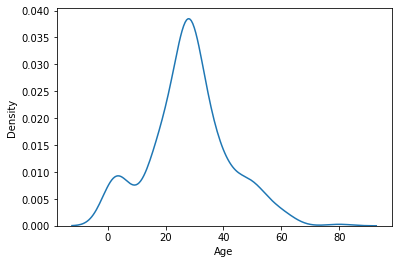

In [109]:
sns.kdeplot(survived_age)

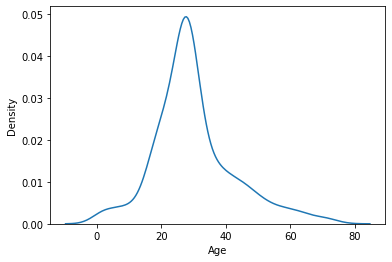

In [110]:
sns.kdeplot(did_not_survive_age)

The distribution of the 2 samples look moderately tailed and roughly symmetric, so we will use Levene's test of homoscedascity using the mean.

In [111]:
import scipy.stats as stats

stats.levene(survived_age, did_not_survive_age, center='mean')


LeveneResult(statistic=2.1599146592342855, pvalue=0.14200714679412685)

Since the p-value is greater than 0.05, we assume equal variance, and conduct a 2-sample t-test assuming equal variance.

In [112]:
stats.ttest_ind(survived_age, did_not_survive_age, equal_var = True)

Ttest_indResult(statistic=-2.084555552476625, pvalue=0.03739522542606736)

The p-value is less than 0.05, so we believe that the mean of the survivors and the non-survivors are different.

Next, let $\mu_1, \mu_2$ be the mean fare price of those who survived and those who did not. Similarly, we test of homoscedasticity and then conduct an appropriate 2-sample t-test for the following hypothesis:
- $H_0:$ $\mu_1 = \mu_2$
-  $H_1:$ $\mu_1 > \mu_2$

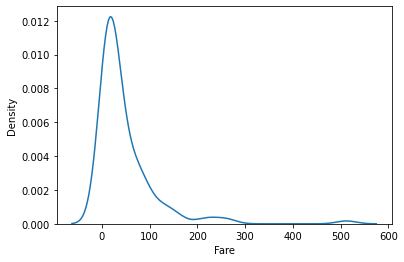

In [113]:
fare_survived = titanic.loc[titanic['Survived'] == 1, 'Fare']
fare_did_not_survive = titanic.loc[titanic['Survived'] == 0, 'Fare']

sns.kdeplot(fare_survived)

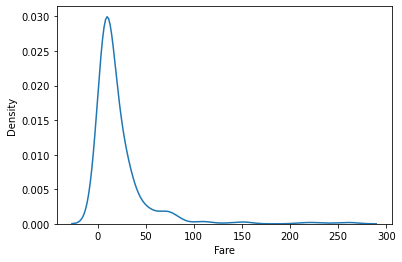

In [114]:
sns.kdeplot(fare_did_not_survive)

The distributions are heavily tailed, so we use `trimmed` for our Levene test.

In [115]:
stats.levene(fare_survived, fare_did_not_survive, center='trimmed')

LeveneResult(statistic=238.4247675701207, pvalue=2.889394120012814e-47)

The p_value is less than 0.05, so we will conduct a 2-sample t-testa assuming unequal variance.

In [116]:
stats.ttest_ind(fare_survived, fare_did_not_survive, equal_var=False, alternative='greater')

Ttest_indResult(statistic=6.759692390425365, pvalue=2.2413301454607168e-11)

The p-value is less than 0.05, so we believe that passengers who pay higher fare price are more likely to survive.

Next, let's look at the correlation of our features with respect to the target variable `Survived`

In [117]:
survived_cross_sex = pd.crosstab(titanic['Survived'], titanic['Sex'])
survived_cross_class = pd.crosstab(titanic['Survived'], titanic['Pclass'])
survived_cross_embarked = pd.crosstab(titanic['Survived'], titanic['Embarked'])
                                    

We run a contigency test to test for independence between these categorical variables. We suspect `Sex` and `Pclass` should be correlated with `Survived`. We test out `Embarked` for fun.

In [118]:
sex_corr, pclass_corr, embarked_corr = stats.chi2_contingency(survived_cross_sex)[1], stats.chi2_contingency(survived_cross_class)[1], stats.chi2_contingency(survived_cross_embarked)[1]
print(f"Correlation with sex: {sex_corr} \n Correlation with Pclass: {pclass_corr} \n Correlation with Embarked: {embarked_corr}")

Correlation with sex: 3.7799096665576e-58 
 Correlation with Pclass: 1.1813624785477922e-22 
 Correlation with Embarked: 1.769922284120912e-06


Apparently all 3 are correlated with `Survived`.

In [119]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

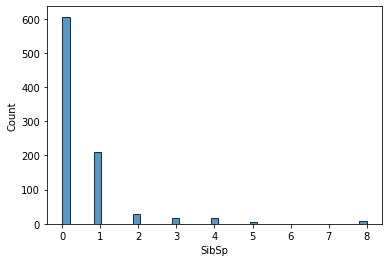

In [120]:
sns.histplot(titanic['SibSp'])

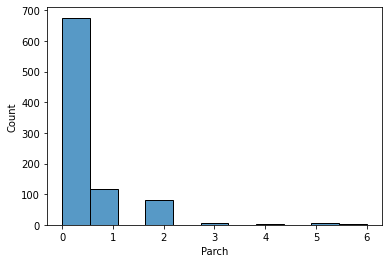

In [121]:
sns.histplot(titanic['Parch'])

We will drop `Sibsp` and `Parch` since the majority of people have 0 siblings and parents on board. We will also drop `PassengerId` since that's not necessary.

In [122]:
titanic.drop(columns = ['SibSp', 'Parch', 'PassengerId'], inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

So now we will some models using the remaning 5 variables.

### Building a Data Preprocessing Pipeline

The steps in our pipeline are as follows:
1. Remove `Name`, `PassengerId`, `Cabin`, `Ticket`, `Sibsp`, `Parch`.
2. Convert `Sex` to numeric values: Female -> 0, Male -> 1.
3. Impute `Embarked` using the mode.
4. Convert `Embarked` to numeric values: C -> 0, Q -> 1, S -> 2
5. Impute `Age` using the median.
6. Normalize `Fare`.
7. Normalize `Age`.

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttrRemover(BaseEstimator, TransformerMixin):
  def __init__(self, remove = None):
      self.remove = remove
  def fit(self, X, y = None):
      return self
  def transform(self, X):
      if self.remove:
        return X.drop(columns = self.remove)
      return X

In [124]:
class CatAttrConverter(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        sex_enc = OneHotEncoder(drop='if_binary')
        sex_encoded = sex_enc.fit_transform(np.array(X['Sex']).reshape(-1,1))
        sex_encoded = sex_encoded.toarray()
        X['Sex'] = sex_encoded.astype(np.uint8)

        emb_imputer = SimpleImputer(strategy='most_frequent')
        emb = X['Embarked']
        emb = emb_imputer.fit_transform(np.array(emb).reshape(-1,1))
        X['Embarked'] = emb
        X['Embarked'] = X['Embarked'].astype('category').cat.codes

        return X

In [125]:
from sklearn.preprocessing import StandardScaler

class NumProcessor(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy='median')
        scaler = StandardScaler()
        imputed_age = imputer.fit_transform(np.array(X['Age']).reshape(-1,1))
        processed_age = scaler.fit_transform(imputed_age)
        X['Age'] = processed_age

        imputed_fare = imputer.fit_transform(np.array(X['Fare']).reshape(-1,1))
        processed_fare = scaler.fit_transform(imputed_fare)
        X['Fare'] = processed_fare

        return X

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

remover = Pipeline([
        ('remover', AttrRemover(remove = ['Name', 'PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Parch']))
    ])

cat_pipeline = Pipeline([
    ('cat_converter', CatAttrConverter())
])

full_pipeline = Pipeline([
    ('remover', remover),
    ('cat_pipeline', cat_pipeline),
    ('num_processor', NumProcessor())
])


In [127]:
## Testing out the pipeline
df = full_pipeline.fit_transform(train.copy())
df[:5]

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,-0.565736,-0.502445,2
1,1,1,0,0.663861,0.786845,0
2,1,3,0,-0.258337,-0.488854,2
3,1,1,0,0.433312,0.420730,2
4,0,3,1,0.433312,-0.486337,2


### Model Building

In [128]:
# Create a train and test set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=11)

for train_index, test_index in split.split(train, train['Survived']):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]


In [129]:
strat_train_set = full_pipeline.fit_transform(strat_train_set)
strat_test_set = full_pipeline.fit_transform(strat_test_set)


In [130]:
X_train = strat_train_set.drop(columns=['Survived'])
y_train = strat_train_set['Survived']

X_test = strat_test_set.drop(columns=['Survived'])
y_test = strat_test_set['Survived']

In [131]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logit_clf = LogisticRegression(random_state = 11)
cross_val_score(logit_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.81118881, 0.71328671, 0.82394366, 0.78873239, 0.79577465])

In [132]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=11)
cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.84615385, 0.74825175, 0.83802817, 0.8028169 , 0.78169014])

In [133]:
# SGD

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=11)
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.8041958 , 0.71328671, 0.75352113, 0.79577465, 0.76760563])

In [134]:
# SVC

from sklearn.svm import SVC

svc_clf = SVC(random_state=11)
cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.79020979, 0.70629371, 0.83098592, 0.78873239, 0.77464789])

In [135]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')

array([0.8041958 , 0.74125874, 0.80985915, 0.82394366, 0.76056338])

The most promising model seems to be Random Forest. Let's do some hyperparameter tuning on this.

In [146]:
# Hyperparameter Tuning on Random Forest

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=64, stop=128, num=32)]
max_features = [int(x) for x in range(1,len(X_train.columns)+1)]
max_depth = [5,6,7,8]
max_depth.append(None)
min_sample_split = [2,4,8,16,32]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split
}

rf_random_search = RandomizedSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_iter=100)
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=11),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, None],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 8, 16, 32],
                                        'n_estimators': [64, 66, 68, 70, 72, 74,
                                                         76, 78, 80, 82, 84, 86,
                                                         88, 90, 92, 94, 97, 99,
                                                         101, 103, 105, 107,
                                                         109, 111, 113, 115,
                                                         117, 119, 121, 123, ...]},
                   return_train_score=True, scoring='accuracy')

In [147]:
rf_random_search.best_params_

{'n_estimators': 78,
 'min_samples_split': 4,
 'max_features': 3,
 'max_depth': 8,
 'bootstrap': True}

In [148]:
best_rf_random = rf_random_search.best_estimator_
cross_val_score(best_rf_random, X_train, y_train, cv=5, scoring='accuracy')

array([0.86013986, 0.79020979, 0.88028169, 0.83098592, 0.81690141])

Now, let's run the model on X_test to see the results.

In [139]:
from sklearn.metrics import accuracy_score

best_rf_random.fit(X_train, y_train)
y_test_preds = best_rf_random.predict(X_test)
accuracy_score(y_test, y_test_preds)

0.7877094972067039

We're ready to run this model on the actual test file and get our predictions to submit WOOHOO!!!

In [140]:
test = pd.read_csv("/content/drive/MyDrive/Educayshion/Colabs/Projects/Titanic/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [149]:
test_passengerid = test['PassengerId']
test_data = test.copy()
test_data = full_pipeline.fit_transform(test_data)
test_preds = best_rf_random.predict(test_data)

In [150]:
submission = pd.DataFrame({'PassengerId': test_passengerid, 'Survived': test_preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [143]:
len(submission)

418

In [151]:
path = "/content/drive/MyDrive/Educayshion/Colabs/Projects/Titanic/titanic_submission.csv"
with open(path, 'w', encoding='utf-8-sig') as f:
    submission.to_csv(f, index=False)